# Proposta

A distribuidora de vinhos FIAPWine decidiu expandir seus horizontes e agora está importanto vinhos tintos e brancos portugueses, mais especificamente a marca "Vinho Verde" que fará sua carta de vinhos se tornar mais vasta aqui no Brasil.

Hoje, o Head de Dados da FIAPWine necessita de uma equipe de dados alinhada com o propósito de gerar insights valiosos ara análise de qualidade dos novos vinhos. Para isso, foi disponibilizada uma base de dados sobre os vinhos portugueses do ano de 2009, cuja referência acadêmica se encontra no artigo de Cortez et al, 2009.

Você foi designado para fazer as análises dos vinhos tintos, então é necessário que você siga os seguintes passos:

## 1 Importe o dataset "winequality-red.csv" que pode ser baixado no seguinte link: aqui

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
dados = pd.read_csv('winequality-red.csv', sep =';')

In [22]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2 Utilize o Pandas para verificar a estrutura do dataset (número de linhas, colunas, tipos de dados das colunas, etc)

In [23]:
dados.shape

(1599, 12)

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
dados['quality'].unique()

array([5, 6, 7, 4, 8, 3])

## 3 Limpe o dataset, removendo linhas duplicadas e tratando valores faltantes

In [27]:
dados.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [28]:
dados_dropados = dados.drop_duplicates()

In [29]:
dados_dropados = dados_dropados.drop(['fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                             'total sulfur dioxide','density','pH','sulphates'], axis=1)

In [30]:
dados_dropados.sort_values('quality', ascending=False).head(20)

,volatile acidity,alcohol,quality
1549,0.36,11.4,8
1403,0.33,10.0,8
481,0.30,11.7,8
495,0.35,11.0,8
1120,0.54,13.1,8
588,0.42,14.0,8
1449,0.38,11.3,8
1061,0.40,12.5,8
455,0.62,13.4,8
440,0.31,9.8,8


In [31]:
dados_dropados.head()

,volatile acidity,alcohol,quality
0,0.70,9.4,5
1,0.88,9.8,5
2,0.76,9.8,5
3,0.28,9.8,6
5,0.66,9.4,5


## 4 Utilize o Matplotlib para visualizas as seguintes informações:

### 4.1 Distribuição de acidez volátil por qualidade do vinho

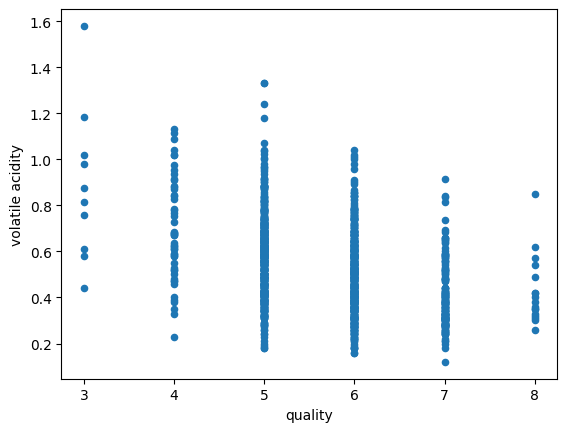

In [32]:
dados_dropados.plot(x='quality', y='volatile acidity', kind='scatter')
plt.show()

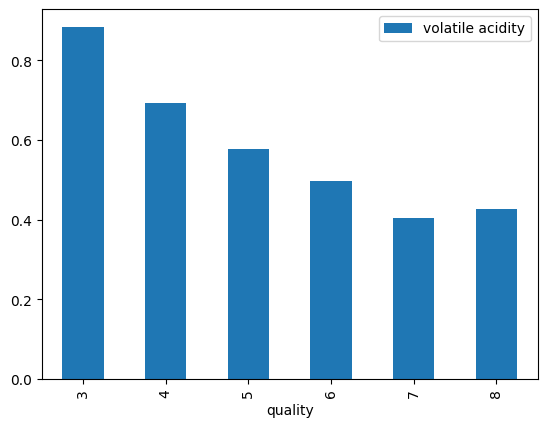

In [33]:
dados_dropados.groupby('quality').mean().plot(y='volatile acidity', kind='bar')
plt.show()

### 4.2 Distribuição do teor alcóolico por qualidade do vinho

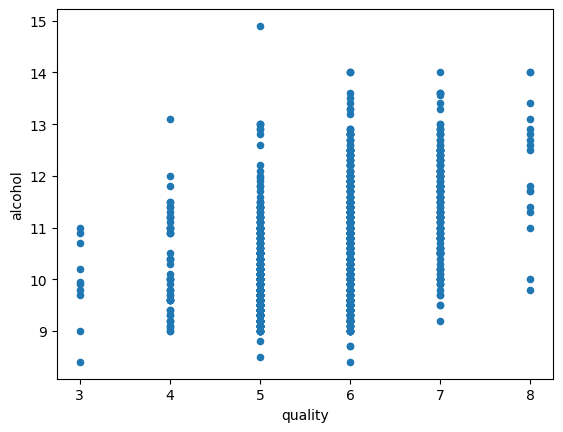

In [34]:
dados_dropados.plot(x='quality', y='alcohol', kind='scatter')
plt.show()

### 4.3 Relação entre acidez volátil e teor alcóolico

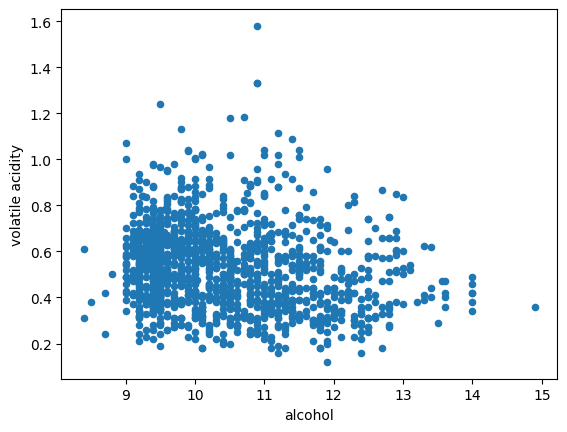

In [35]:
dados_dropados.plot(x='alcohol', y='volatile acidity', kind='scatter')
plt.show()

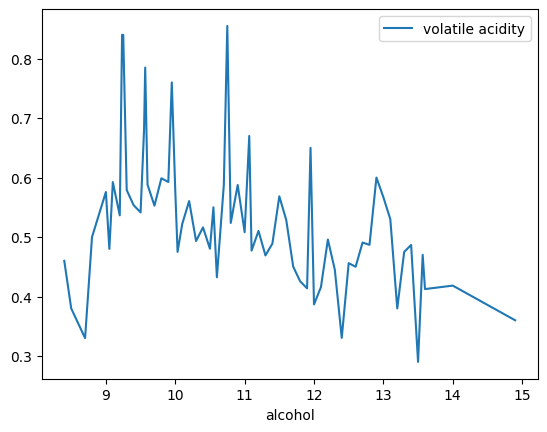

In [36]:
dados_dropados.groupby('alcohol').mean().plot(y='volatile acidity', kind='line')
plt.show()

### 4.4 Relação entre teor alcóolico e qualidade do vinho

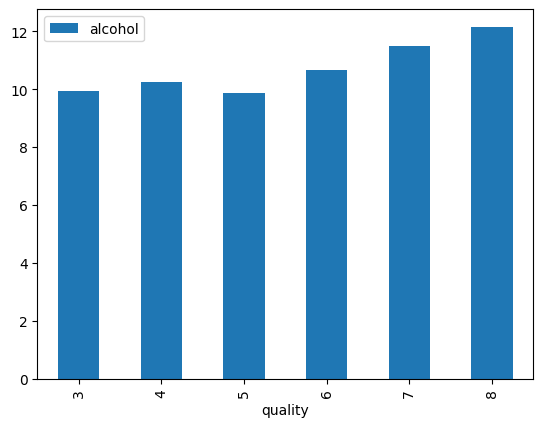

In [37]:
dados_dropados.groupby('quality').mean().plot(y='alcohol', kind='bar')
plt.show()

## 5 Analise os resultados e responda as seguintes perguntas:

### 5.1 Qual a acidez volátil média dos vinhos de qualidade elevada?

In [38]:
dados_dropados.groupby('quality')['alcohol'].mean()

,alcohol
quality,
3,9.955000
4,10.265094
5,9.888562
6,10.658879
7,11.491118
8,12.158824


In [39]:
elevados = dados_dropados[dados_dropados['quality'] >= 6]
elevados['alcohol'].mean()

np.float64(10.887644877144183)

**Resposta:** Os vinhos de maior qualidade (nota 8) tem, em média, 12.16% de teor alcóolico. Considerando as três maiores notas (6, 7 e 8) o teor alcólico médio cai para 10,89%.

### 5.2 Qual a relação entre teor alcóolico e qualidade do vinho?

In [40]:
dados_dropados.corr()

,volatile acidity,alcohol,quality
volatile acidity,1.000000,-0.197812,-0.395214
alcohol,-0.197812,1.000000,0.480343
quality,-0.395214,0.480343,1.000000


**Resposta:** Teor alcóolico e qualidade do vinho tendem a subir juntos, com coeficiente de correlação de 0,48.

### 5.3 Há alguma relação entre acidez volátil e teor acóolico?

**Resposta:** Teor alcóolico e acidez volátil tem uma baixa relação inversamente proporcional, com coeficiente de correlação de -0,20.

### 5.4 Há alguma relação entre acidez volátil e qualidade do vinho?

**Resposta:** Qualidade do vinho e acidez volátil tem uma  relação inversamente proporcional, com coeficiente de correlação de -0,39.